## Importación de librerias 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

## Carga del archivo CSV

In [205]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/jumping_spider_salticidae/datasets/salticidae_mexico_conabio.csv')

## Análisis exploratorio

In [135]:
# datos cargados
# muestra las primeras filas del dataframe
df.head(2)

,idejemplar,numcatalogo,numcolecta,coleccion,institucion,paiscoleccion,colector,fechacolecta,diacolecta,mescolecta,...,usvserieIV,usvserieV,usvserieVI,vegetacionserenanalcms,mt24claveestadomapa,mt24nombreestadomapa,mt24clavemunicipiomapa,mt24nombremunicipiomapa,incertidumbreXY,geoportal
0,11f9827c7db57a6ad07e10ff827ab5c3,8392,NaN,MACN-Ar Colección Nacional de Aracnología,MACN Museo Argentino de Ciencias Naturales Ber...,ARGENTINA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,82a23e1556b9ca2a7610a8b955ecf4c1,7270,NaN,MACN-Ar Colección Nacional de Aracnología,MACN Museo Argentino de Ciencias Naturales Ber...,ARGENTINA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [136]:
# columnas del dataframe
df.columns

Index(['idejemplar', 'numcatalogo', 'numcolecta', 'coleccion', 'institucion',
       'paiscoleccion', 'colector', 'fechacolecta', 'diacolecta', 'mescolecta',
       'aniocolecta', 'determinador', 'fechadeterminacion', 'diadeterminacion',
       'mesdeterminacion', 'aniodeterminacion', 'calificadordeterminacion',
       'tipo', 'procedenciaejemplar', 'ejemplarfosil', 'obsusoinfo',
       'formadecitar', 'licenciauso', 'proyecto', 'urlorigen',
       'ultimafechaactualizacion', 'version', 'reino', 'phylumdivision',
       'clase', 'orden', 'familia', 'genero', 'especie',
       'categoriainfraespecie', 'categoriainfraespecie2', 'estatustax',
       'idnombrecat', 'reftax', 'autor', 'reinovalido', 'phylumdivisionvalido',
       'clasevalida', 'ordenvalido', 'familiavalida', 'generovalido',
       'especievalida', 'categoriainfraespecievalida',
       'categoriainfraespecie2valida', 'idnombrecatvalido', 'reftaxvalido',
       'autorvalido', 'ambiente', 'categoriaresidenciaaves',
       'fo

In [137]:
# identifica el tipo de datos de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12731 entries, 0 to 12730
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idejemplar                    12731 non-null  object 
 1   numcatalogo                   2810 non-null   object 
 2   numcolecta                    976 non-null    object 
 3   coleccion                     12731 non-null  object 
 4   institucion                   12731 non-null  object 
 5   paiscoleccion                 12726 non-null  object 
 6   colector                      8306 non-null   object 
 7   fechacolecta                  12352 non-null  object 
 8   diacolecta                    12352 non-null  float64
 9   mescolecta                    12479 non-null  float64
 10  aniocolecta                   12483 non-null  float64
 11  determinador                  6799 non-null   object 
 12  fechadeterminacion            10319 non-null  object 
 13  d

In [138]:
# dimensión del dataframe
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 12731
Número de columnas: 98


## Limpiesa de datos

In [140]:
# se verifica la completitud de las variables (valores nulos existentes)
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull())
nulos = df.isnull().sum()

# calculo del porcentaje de completitud
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices
# inplace = True sirve para evitar la repetición
completitud.reset_index(inplace = True)
# se coloan encebezados
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,idejemplar,100.000000
1,numcatalogo,22.072107
2,numcolecta,7.666326
3,coleccion,100.000000
4,institucion,100.000000
...,...,...
93,mt24nombreestadomapa,0.494855
94,mt24clavemunicipiomapa,0.494855
95,mt24nombremunicipiomapa,0.494855
96,incertidumbreXY,65.210903


In [142]:
# filtrar  arañas encontradas en México
df = df[df['paisoriginal'].str.contains('Mexico', na=False, case=False)]

In [143]:
# eliminacion de los datos duplicados
df.drop_duplicates(inplace=True)

# eliminacion de los datos faltantes
df = df.dropna(subset=[ 'paiscoleccion','familiavalida','generovalido','estadooriginal'])

# .fillna reemplazará todos los valores NaN (vacíos) en la columna "especievalida" con "sp."
# .replace reemplazará las celdas vacías ("") con ".sp" en la columna "especievalida"
df['especievalida'] = df['especievalida'].fillna('sp.').replace('', 'sp.')




# las columnas con menos del 80% de completitud son eliminadas
# define una serie de pandas  con el nombre de las columnas
cols_incompletas = completitud['variable'][completitud['completitud']<80]
# se eliminan esas columnas
df = df.drop(cols_incompletas, axis=1) # 1 columnas 0 filas
df.head(2)

,idejemplar,coleccion,institucion,paiscoleccion,fechacolecta,diacolecta,mescolecta,aniocolecta,fechadeterminacion,diadeterminacion,...,altitudmapa,geovalidacion,validacionambiente,usvserieI,usvserieII,usvserieIII,usvserieIV,usvserieV,usvserieVI,geoportal
0,11f9827c7db57a6ad07e10ff827ab5c3,MACN-Ar Colección Nacional de Aracnología,MACN Museo Argentino de Ciencias Naturales Ber...,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sin coordenadas,No procesado,NaN,NaN,NaN,NaN,NaN,NaN,0
1,82a23e1556b9ca2a7610a8b955ecf4c1,MACN-Ar Colección Nacional de Aracnología,MACN Museo Argentino de Ciencias Naturales Ber...,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sin coordenadas,No procesado,NaN,NaN,NaN,NaN,NaN,NaN,0


In [144]:
# se verifica la completitud de las variables (valores nulos existentes)
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull())
nulos = df.isnull().sum()

# calculo del porcentaje de completitud
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices
# inplace = True sirve para evitar la repetición
completitud.reset_index(inplace = True)
# se coloan encebezados
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,idejemplar,100.000000
1,coleccion,100.000000
2,institucion,100.000000
3,paiscoleccion,100.000000
4,fechacolecta,99.125168
...,...,...
61,usvserieIII,91.781629
62,usvserieIV,91.773217
63,usvserieV,92.513459
64,usvserieVI,91.781629


In [200]:
completitud.sort_values(by='completitud', ascending=True).head(60)

,variable,completitud
28,autor,85.649394
24,especie,85.649394
25,estatustax,85.649394
9,diadeterminacion,86.313930
8,fechadeterminacion,86.313930
10,mesdeterminacion,86.902759
11,aniodeterminacion,87.600942
15,urlorigen,88.307537
59,usvserieI,91.470390
62,usvserieIV,91.773217


In [146]:
# dimensión del dataframe con eliminacion de datos duplicados
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 11888
Número de columnas: 66


## Análisis exploratorio posterior a la limpieza de datos

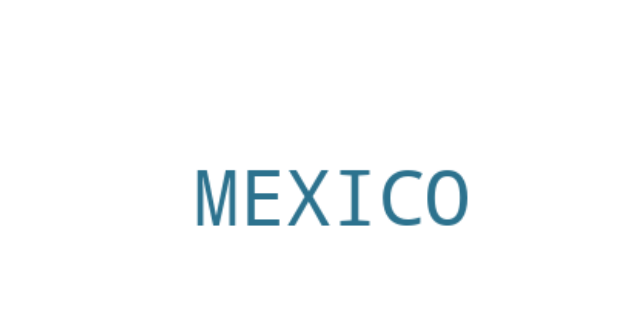

In [148]:
# word cloud
# generar el texto a partir de paiscoleccion 
text = " ".join(df['paisoriginal'].astype(str))

# crear la nube de palabras
wordcloud = WordCloud(
    max_words=50,
    max_font_size=50,
    colormap='viridis',
    background_color="white"
).generate(text)

# configurar y mostrar el gráfico
plt.figure(figsize=(8, 4))  # establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # mostrar la nube de palabras
plt.axis("off")  # ocultar ejes
plt.show()  # mostrar la figura

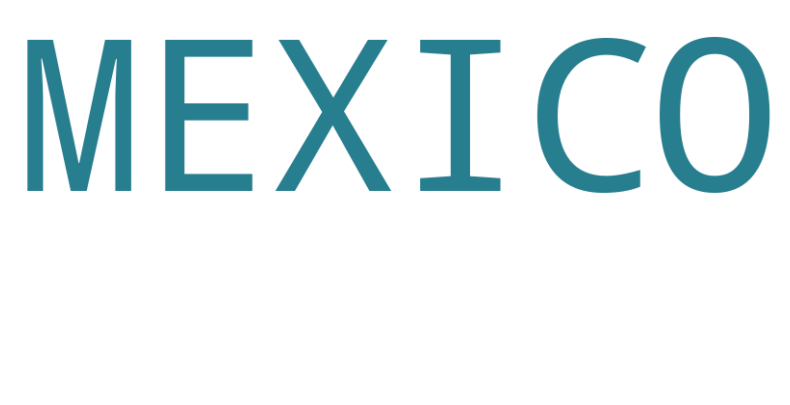

In [149]:
paisoriginal_df = df['paisoriginal'].value_counts()

# word cloud
# generar el texto a partir de generovalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(paisoriginal_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

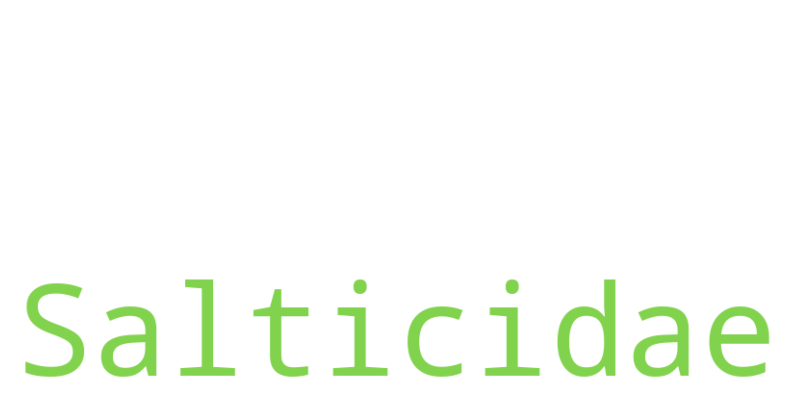

In [150]:
familiavalida_df = df['familiavalida'].value_counts()

# word cloud
# generar el texto a partir de generovalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(familiavalida_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

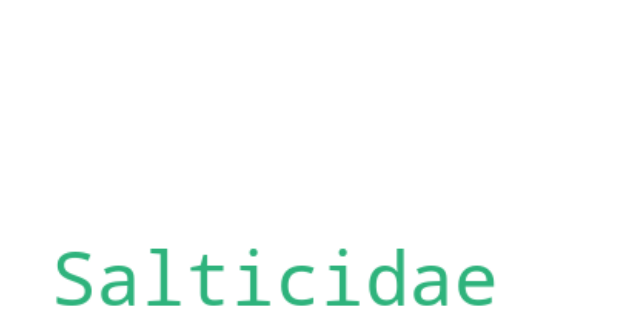

In [151]:
# word cloud
# generar el texto a partir de familiavalida 
text = " ".join(df['familiavalida'].astype(str))

# crear la nube de palabras
wordcloud = WordCloud(
    max_words=50,
    max_font_size=50,
    colormap='viridis',
    background_color="white"
).generate(text)

# configurar y mostrar el gráfico
plt.figure(figsize=(8, 4))  # establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # mostrar la nube de palabras
plt.axis("off")  # ocultar ejes
plt.show()  # mostrar la figura

In [152]:
#¿Cómo se distribuyen las arañas por género?
# Contar el número de especies por género

# Eliminar filas donde 'especievalida' contiene "sp"
generos_mas_comunes = df[~df['especievalida'].str.contains("sp.", na=False)]

# Contar el número de especies por género después de eliminar las filas
generos_mas_comunes_df = generos_mas_comunes['generovalido'].value_counts()

# Mostrar los géneros más comunes
print("Géneros más comunes en México:")
print(generos_mas_comunes_df.head(10))

Géneros más comunes en México:
generovalido
Paraphidippus    2513
Menemerus        1918
Phidippus        1840
Habronattus       725
Plexippus         396
Colonus           344
Messua            284
Sassacus          234
Hasarius          232
Lyssomanes        177
Name: count, dtype: int64


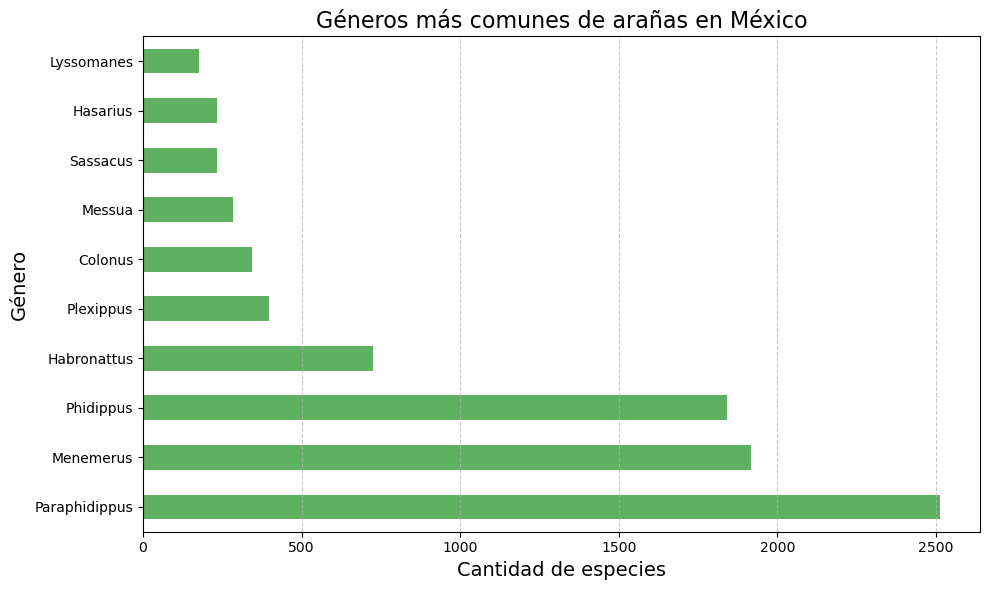

In [153]:
# graficar los géneros más comunes en México
generos_mas_comunes_df.head(10).plot(kind='barh', color='#5EB160', figsize=(10, 6))
plt.title('Géneros más comunes de arañas en México', fontsize=16)
plt.xlabel('Cantidad de especies', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

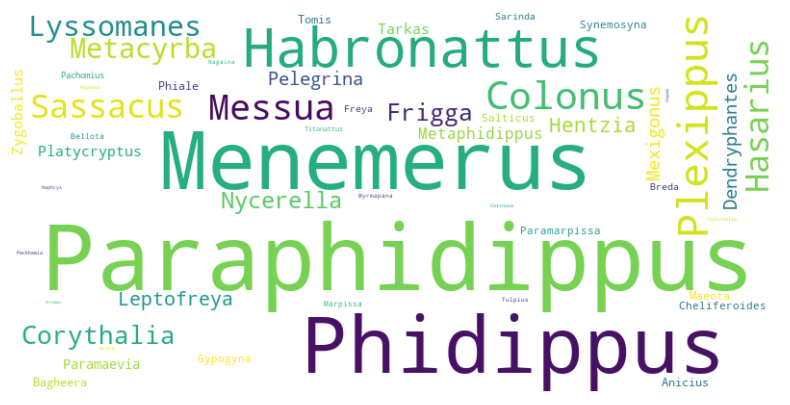

In [154]:
# word cloud
# generar el texto a partir de generovalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(generos_mas_comunes_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

In [155]:
#¿Cuántas especies únicas hay en México?
# Contar especies únicas
especies_unicas = generos_mas_comunes['especievalida'].nunique()
print(f"Cantidad de especies únicas en México: {especies_unicas}")

Cantidad de especies únicas en México: 217


In [156]:
especies_unicas_df = generos_mas_comunes['especievalida'].value_counts()
especies_unicas_df.head(10)

especievalida
Paraphidippus aurantius    2003
Menemerus bivittatus       1794
Phidippus audax             519
Paraphidippus fartilis      503
Plexippus paykulli          387
Colonus sylvanus            337
Phidippus arizonensis       285
Messua limbata              280
Hasarius adansoni           232
Phidippus cruentus          202
Name: count, dtype: int64

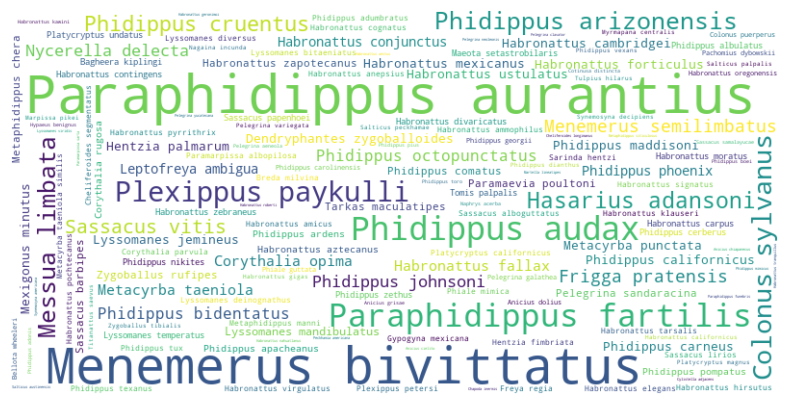

In [157]:
# word cloud
# generar el texto a partir de especiesvalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(especies_unicas_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

## Filtrado de registros

### Arañas en México y otros paises

### Arañas de México